In [1]:
from ctlearn_manager.tri_model import CTLearnTriModelManager
from ctlearn_manager.io.io import load_model_from_index
from ctlearn_manager.utils.sky_coord_utils import DL2DataProcessor
from ctlearn_manager.utils.utils import ClusterConfiguration
import astropy.units as u

🔧 Using cluster lst-cluster with account aswg and python environment ctlearn
🔧 Using cluster lst-cluster with account aswg and python environment ctlearn


In [2]:
MODEL_INDEX_FILE = "/home/bastien.lacave/PhD/Analysis/CTLearnManager/ctlearn_models_index.h5"
i = 4
cluster_config = ClusterConfiguration(python_env='ctlearn', partition='short', time='2:00:00')
energy_model = load_model_from_index(f"LST1_energy_CRABdec_{i}", MODEL_INDEX_FILE)
direction_model = load_model_from_index(f"LST1_direction_CRABdec_{i}", MODEL_INDEX_FILE)
type_model = load_model_from_index(f"LST1_type_CRABdec_{i}", MODEL_INDEX_FILE)
Stereo_Tri_Model = CTLearnTriModelManager(direction_model=direction_model, energy_model=energy_model, type_model=type_model, cluster_configuration=cluster_config)

🔧 Using cluster lst-cluster with account aswg and python environment ctlearn
🧠 Model name: LST1_energy_CRABdec_4
🧠 Model name: LST1_direction_CRABdec_4
🧠 Model name: LST1_type_CRABdec_4


In [3]:
import glob
dl2_files_tjark = glob.glob("/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run0*.h5")
dl2_files_bastien = glob.glob("/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/03232/LST-1.Run03232.*.dl2.h5")
print(len(dl2_files_bastien))
# Theta2plot = DL2DataProcessor(dl2_files_tjark, Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")
# Theta2plot = DL2DataProcessor(dl2_files_bastien, Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/03232/")
Theta2plot = DL2DataProcessor([
    '/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run02929.h5',
    '/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run03232.h5',
    ], Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")

36
Loading reco directions from /home/bastien.lacave/PhD/data/CTLearn/Tjark/dl2_LST-1.Run02929_reco_directions.pkl
Loading pointings from /home/bastien.lacave/PhD/data/CTLearn/Tjark/dl2_LST-1.Run02929_pointings.pkl
26945 events after cuts
Loading reco directions from /home/bastien.lacave/PhD/data/CTLearn/Tjark/dl2_LST-1.Run03232_reco_directions.pkl
Loading pointings from /home/bastien.lacave/PhD/data/CTLearn/Tjark/dl2_LST-1.Run03232_pointings.pkl
31133 events after cuts


[107.31124267 107.31150845 107.31203378 ... 114.50321695 114.50378017
 114.50437616] deg
[263.61156597 263.61165451 263.61173023 ... 266.64751514 266.64759343
 266.64781424] deg


Text(0, 0.5, 'Altitude [deg]')

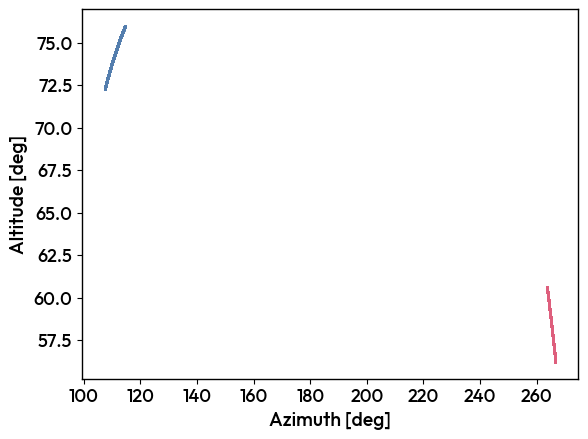

In [4]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for table in Theta2plot.dl2s_cuts:
    print(table['azimuth'].to(u.deg))
    plt.scatter(table['azimuth'].to(u.deg), table['altitude'].to(u.deg), s=1)

plt.xlabel('Azimuth [deg]')
plt.ylabel('Altitude [deg]')


/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py:244: RuntimeWarning: divide by zero encountered in divide
  flux_factor[tolerance_mask] *= (N_sigma / lima_signi[tolerance_mask])


<Figure size 1000x800 with 0 Axes>

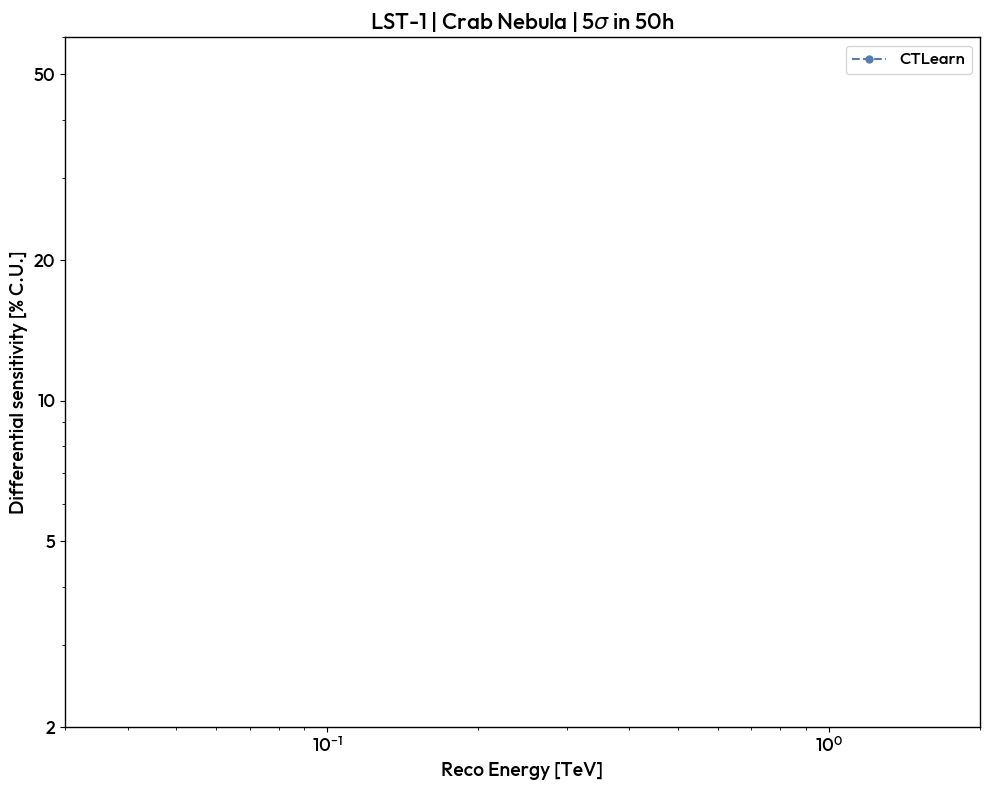

In [5]:
Theta2plot.plot_sensitivity()

Computing on-off counts...


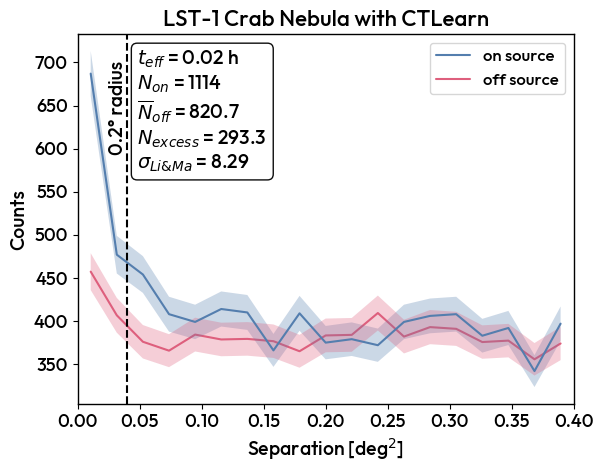

In [6]:
Theta2plot.plot_theta2_distribution(bins=20,)
# Theta2plot.plot_theta2_distribution(DL2_files= ["/home/bastien.lacave/LST-1.Run02929.0000.dl2.h5"], bins=10, tel_id=1, gammaness_cut=0.0)

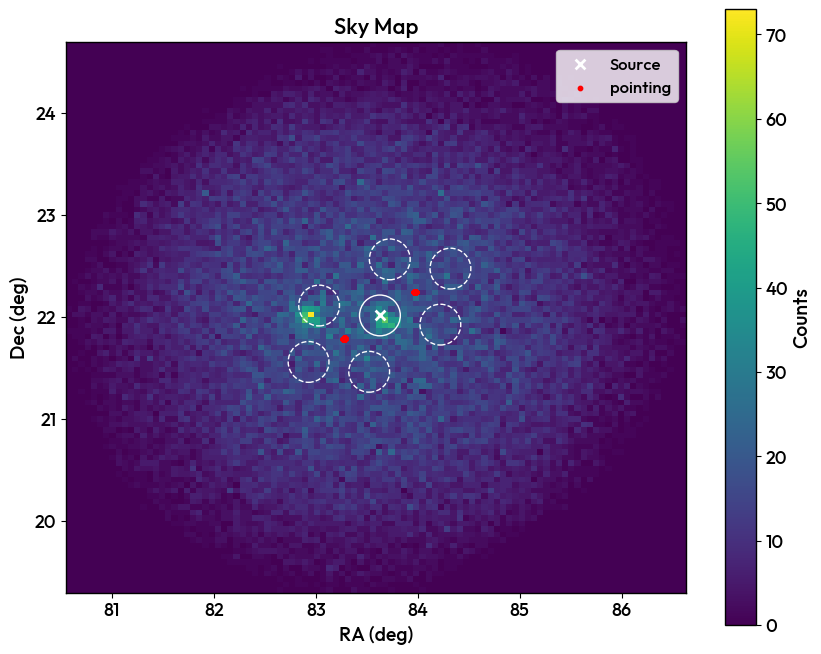

In [7]:
Theta2plot.plot_skymap()